## Test grid search
Lily wants our final code to have a working grid search across logistic, decision tree models as well as random forest

In [7]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import Run_Model as run_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
t1 = (2012, 2014)
t2 = (2015, 2015)
additional_cont_feat, final_df = make_officer_df.make_df(t1, t2)


In [9]:
cont_feat = ["birth_year", "start_date_timestamp"]
cont_feat.extend(additional_cont_feat)
cat_feat = ["gender", "race"]

desired_targets = ['target_use_of_force', 'target_drug', 'target_racial',
                   'target_sustained', 'target_nonviolent']
target_col = "any_known_complaint"
feat_engineering_helpers.make_target_col(final_df, desired_targets, target_col)


got to  LogisticRegression
parameter dictionary is [{'penalty': ('l2', 'none'), 'C': [0.01, 0.1, 1, 10, 100], 'random_state': (3,)}]

best  LogisticRegression  metrics:
{'precision': 0.6666666666666666, 'recall': 0.02857142857142857, 'f1-score': 0.0547945205479452, 'support': 210}
balanced_accuracy: 0.5130612244897959

got to  GaussianNB
parameter dictionary is [{'priors': (None,)}]

best  GaussianNB  metrics:
{'precision': 0.15033657442034407, 'recall': 0.9571428571428572, 'f1-score': 0.259857789269554, 'support': 210}
balanced_accuracy: 0.5148979591836735

got to  DecisionTree
parameter dictionary is [{'criterion': ('gini', 'entropy'), 'max_depth': [3, 7, 9, 13], 'min_samples_split': [2, 5, 10]}]

best  DecisionTree  metrics:
{'precision': 0.205607476635514, 'recall': 0.10476190476190476, 'f1-score': 0.138801261829653, 'support': 210}
balanced_accuracy: 0.5176870748299319


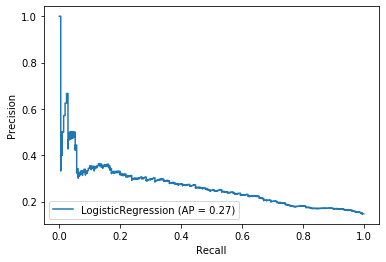

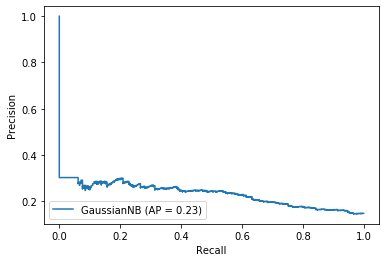

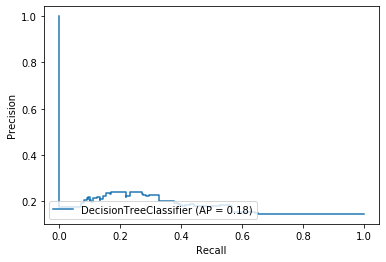

In [12]:
many_models = run_model.try_four_models(final_df, target_col, cont_feat, cat_feat, "balanced_accuracy")

In [11]:
best_log = many_models[0]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_log.predict_proba